# SC1015 LAB 4 Linear Regrassion

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


Marks distribution

3 points for Problem 1 2 points for train-test set and regression in (a) + 1 point for metrics in (b)

3 points for Problem 2 2 points for the two regressions + 1 point for comparison and justifications

4 points for Problem 3 2 points for outlier removal in (a) + 1 point for model in (b) + 1 point for (c)

## Problem 1

a) Create appropriate datasets for Train and Test in an 80:20 ratio and fit a Linear Regression model on the Train
set to predict SalePrice using GrLivArea. Print the coefficients of your model and plot the regression line.

b) Check the Goodness of Fit of the model on the Train set and Prediction Accuracy of the model on the Test set.
Print the metrics for Goodness of Fit and Prediction Accuracy that you think are appropriate in each scenario.

In [3]:
#1a

# Response Variable : SalePrice
# Predictor Feature : GrLivArea
    
traindata = pd.read_csv('train.csv')

sp = pd.DataFrame(traindata['SalePrice'])
ga = pd.DataFrame(traindata['GrLivArea'])

# Train Set : 600 samples
#sp_train = pd.DataFrame(sp[:800])
#ga_train = pd.DataFrame(ga[:800])

# Test Set : 200 samples
#sp_test = pd.DataFrame(sp[-200:])
#ga_test = pd.DataFrame(ga[-200:])

ga_train, ga_test, sp_train, sp_test = train_test_split( ga, sp,  test_size = 0.2)

# Check the sample sizes
print("Train Set :", sp_train.shape, ga_train.shape)
print("Test Set  :", sp_test.shape, ga_test.shape)

Train Set : (1168, 1) (1168, 1)
Test Set  : (292, 1) (292, 1)


In [4]:
# Summary Statistics for HP Train
ga_train.describe()

,GrLivArea
count,1168.000000
mean,1523.946918
std,523.341175
min,334.000000
25%,1143.500000
50%,1478.000000
75%,1786.000000
max,5642.000000


In [5]:
# Summary Statistics for Total Train
sp_train.describe()

,SalePrice
count,1168.000000
mean,181709.682363
std,80009.665002
min,34900.000000
25%,130000.000000
50%,163945.000000
75%,215000.000000
max,755000.000000


<AxesSubplot:>

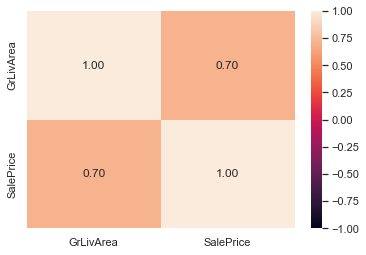

In [6]:
# Create a joint dataframe by concatenating the two variables
traindf = pd.concat([ga_train, sp_train], axis = 1).reindex(ga_train.index)
traindf.corr(method ='pearson')

# Jointplot of Total Train against HP Train
#sb.jointplot(data = traindf, x = "GrLivArea", y = "SalePrice", height = 12)

# Calculate the correlation between the two columns/variables
sb.heatmap(traindf.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [7]:
# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(ga_train, sp_train)

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [17869.91431558]
Coefficients 	: a =  [[107.51015415]]


### Answer to Q1 a) 107.24140234

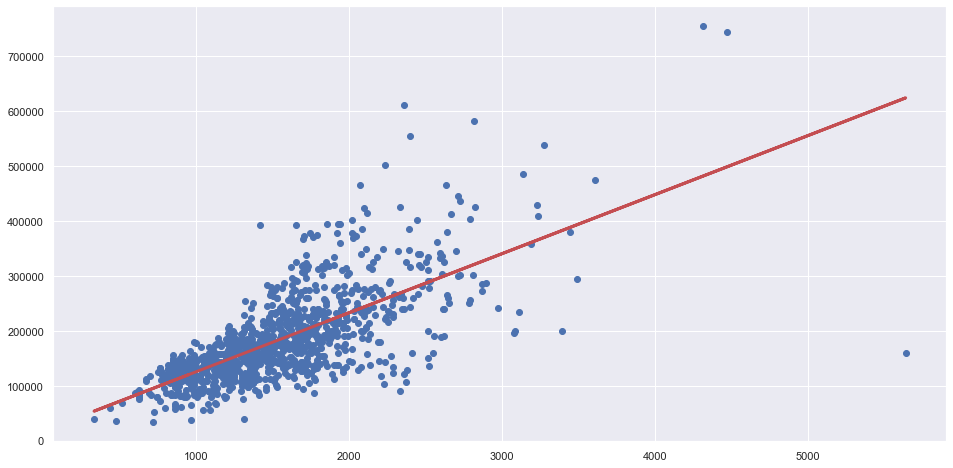

In [8]:
#Q1a) Plot
# Formula for the Regression line
regline_x = ga_train
regline_y = linreg.intercept_ + linreg.coef_ * ga_train

# Plot the Linear Regression line / Plot the regression line based on the coefficients-intercept form
f = plt.figure(figsize=(16, 8))
plt.scatter(ga_train, sp_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

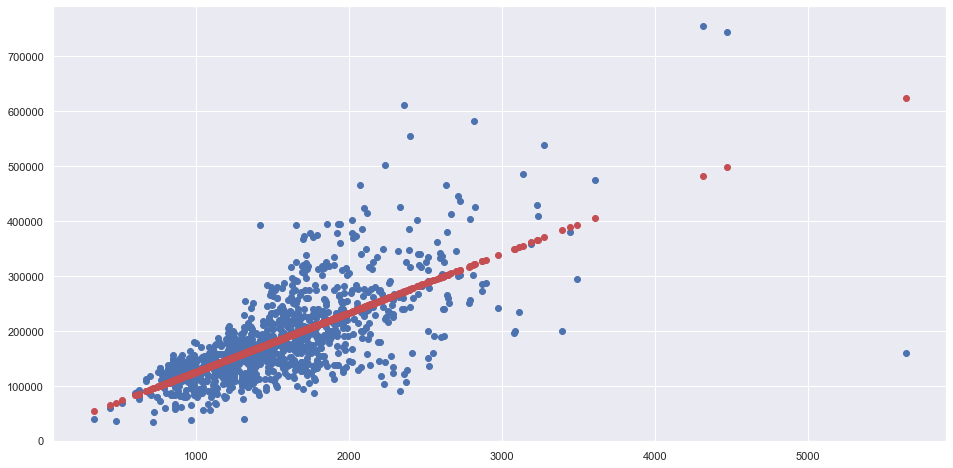

In [9]:
# Predict Total values corresponding to HP Train
sp_train_pred = linreg.predict(ga_train)

# Plot the Linear Regression line / Plot the regression line by prediction using the model.
f = plt.figure(figsize=(16, 8))
plt.scatter(ga_train, sp_train)
plt.scatter(ga_train, sp_train_pred, color = "r")
plt.show()

### Q1B)

#### Goodness of Fit of the Model

Check how good the predictions are on the Train Set.    
Metrics : Explained Variance and Mean Squared Error.

In [25]:
#1b
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(ga_train, sp_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(sp_train, sp_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))



Explained Variance (R^2) 	: 0.4942680886430748
Mean Squared Error (MSE) 	: 9848381326.590298
Root Mean Squared Error (RMSE) 	: 99239.01111251712


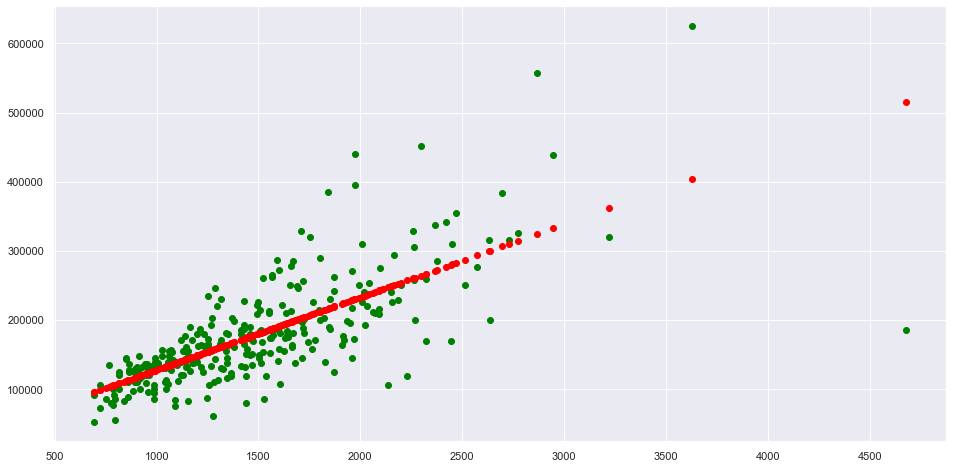

Explained Variance (R^2) 	: 0.5341388892009162
Mean Squared Error (MSE) 	: 2765931941.0642443
Root Mean Squared Error (RMSE) 	: 52592.128128306846


In [26]:

# Predict Total values corresponding to GrLivArea Test
sp_test_pred = linreg.predict(ga_test)

# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(ga_test, sp_test, color = "green")
plt.scatter(ga_test, sp_test_pred, color = "red")
plt.show()


# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(ga_test, sp_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(sp_test, sp_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))


In [11]:
X_train, X_test, y_train, y_test = train_test_split(ga, sp, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Predict Total values corresponding to HP
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()


Intercept of Regression 	: b =  [13692.74697934]
Coefficients of Regression 	: a =  [[111.12709332]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.522535248365384
Mean Squared Error (MSE) 	: 3134000810.705842



Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4250706089195532
Mean Squared Error (MSE) 	: 3180577294.6451054



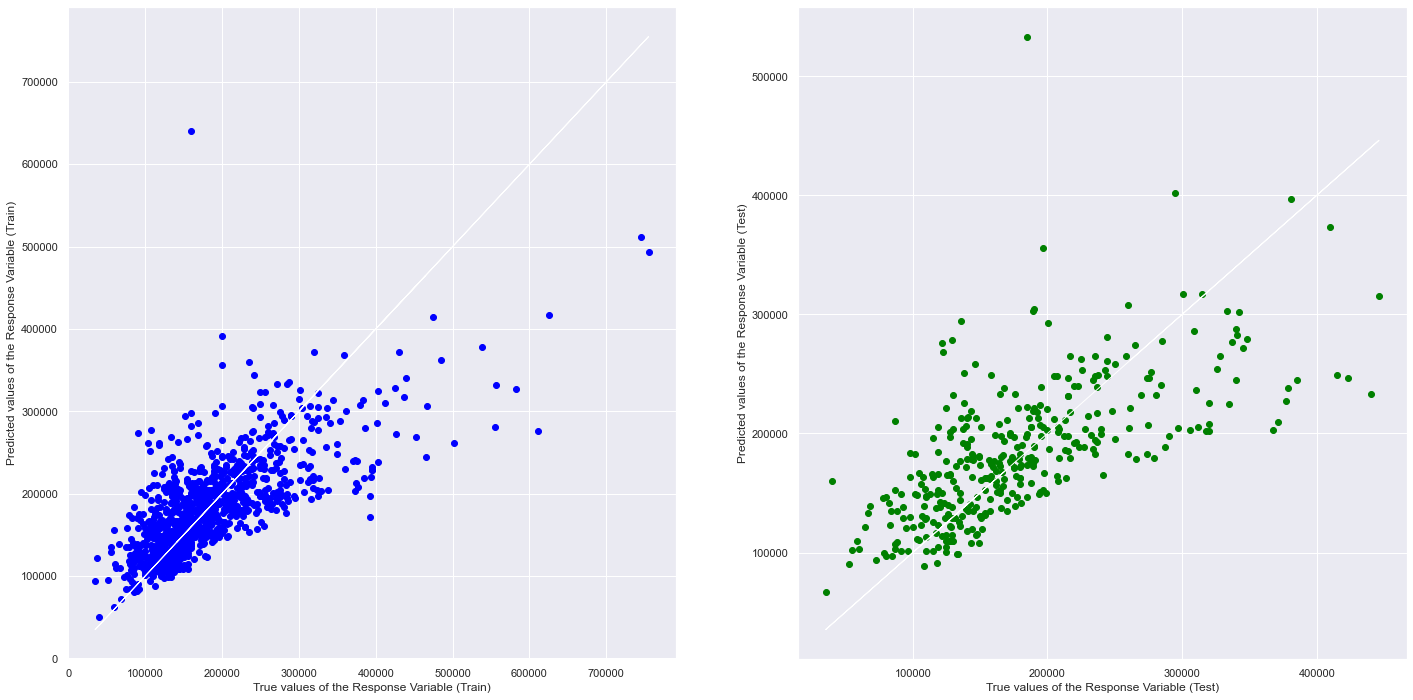

In [15]:


# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

## Problem 2

Following the steps from the previous problem, build two new uni-variate Linear Regression models to predict SalePrice
using the variables TotalBsmtSF and GarageArea, individually. Justify which of the three models is the best in this case.

In [40]:
# Extract Response and Predictors
y = pd.DataFrame(traindata["SalePrice"])
X = pd.DataFrame(traindata[["TotalBsmtSF", "GarageArea", "GrLivArea"]])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (1095, 1) (1095, 3)
Test Set  : (365, 1) (365, 3)


In [41]:
# Summary Statistics for Response
y_train.describe()

,SalePrice
count,1095.000000
mean,181812.166210
std,81624.993728
min,34900.000000
25%,130000.000000
50%,163990.000000
75%,213245.000000
max,755000.000000


In [42]:
# Summary Statistics for Response
X_train.describe()

,TotalBsmtSF,GarageArea,GrLivArea
count,1095.000000,1095.000000,1095.000000
mean,1065.224658,473.406393,1513.119635
std,453.166732,214.145678,536.471560
min,0.000000,0.000000,438.000000
25%,796.000000,327.000000,1124.000000
50%,1005.000000,480.000000,1456.000000
75%,1302.000000,576.000000,1772.500000
max,6110.000000,1418.000000,5642.000000


In [19]:

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

Intercept of Regression 	: b =  [-21759.75223026]
Coefficients of Regression 	: a =  [[ 48.96583167 105.96497103  66.68435484]]



,Predictors,Coefficients
0,TotalBsmtSF,48.965832
1,GarageArea,105.964971
2,GrLivArea,66.684355


In [44]:
def st(hp,total):
    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(hp, total, test_size = 0.25)

    # Linear Regression using Train Data
    linreg = LinearRegression()         # create the linear regression object
    linreg.fit(X_train, y_train)        # train the linear regression model

    # Coefficients of the Linear Regression line
    print('Intercept of Regression \t: b = ', linreg.intercept_)
    print('Coefficients of Regression \t: a = ', linreg.coef_)
    print()

    # Predict Total values corresponding to HP
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print()

    # Plot the Predictions vs the True values
    f, axes = plt.subplots(1, 2, figsize=(24, 12))
    axes[0].scatter(y_train, y_train_pred, color = "blue")
    axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
    axes[0].set_xlabel("True values of the Response Variable (Train)")
    axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
    axes[1].scatter(y_test, y_test_pred, color = "green")
    axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
    axes[1].set_xlabel("True values of the Response Variable (Test)")
    axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
    plt.show()
    
    return y_train_pred, y_test_pred


Intercept of Regression 	: b =  [68281.23460377]
Coefficients of Regression 	: a =  [[108.27482965]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.3501738738685376
Mean Squared Error (MSE) 	: 4692643717.637932

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.4187291171429153
Mean Squared Error (MSE) 	: 2856975105.4190073



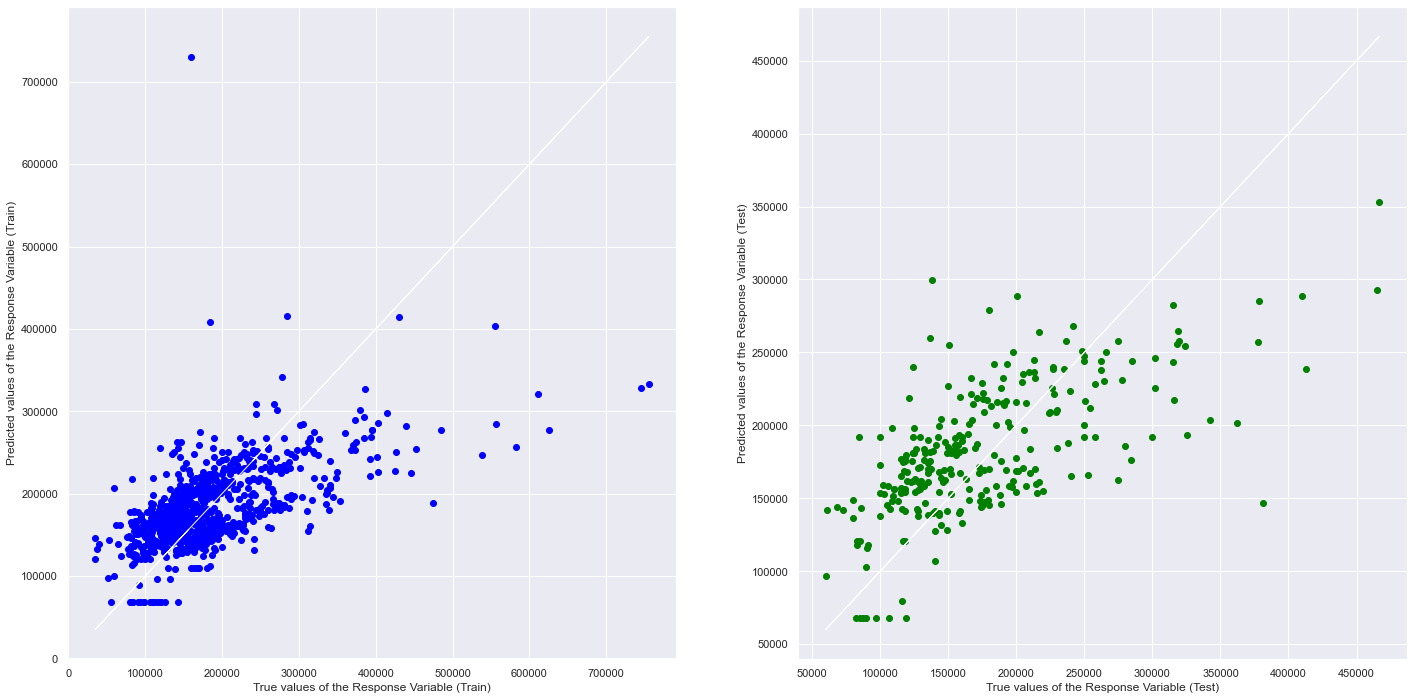

In [46]:
st(X_train[["TotalBsmtSF"]],y_train)

Intercept of Regression 	: b =  [65569.60169342]
Coefficients of Regression 	: a =  [[246.84031363]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.39983889273908735
Mean Squared Error (MSE) 	: 4219339165.245486

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.3698987984122747
Mean Squared Error (MSE) 	: 3487429698.549034



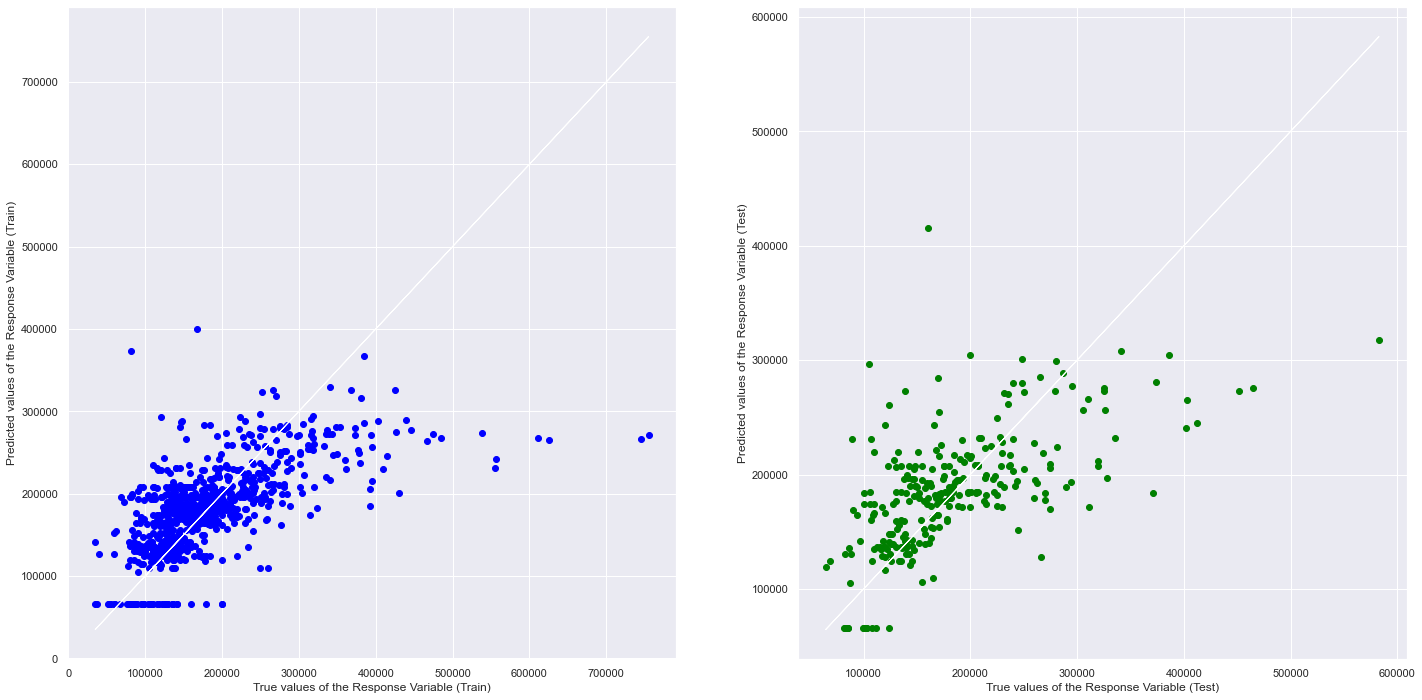

In [47]:
st(X_train[["GarageArea"]],y_train)

Intercept of Regression 	: b =  [19407.39672993]
Coefficients of Regression 	: a =  [[106.95584659]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.5048263918636307
Mean Squared Error (MSE) 	: 3411343425.8874187

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.5218783591689521
Mean Squared Error (MSE) 	: 2848964442.946009



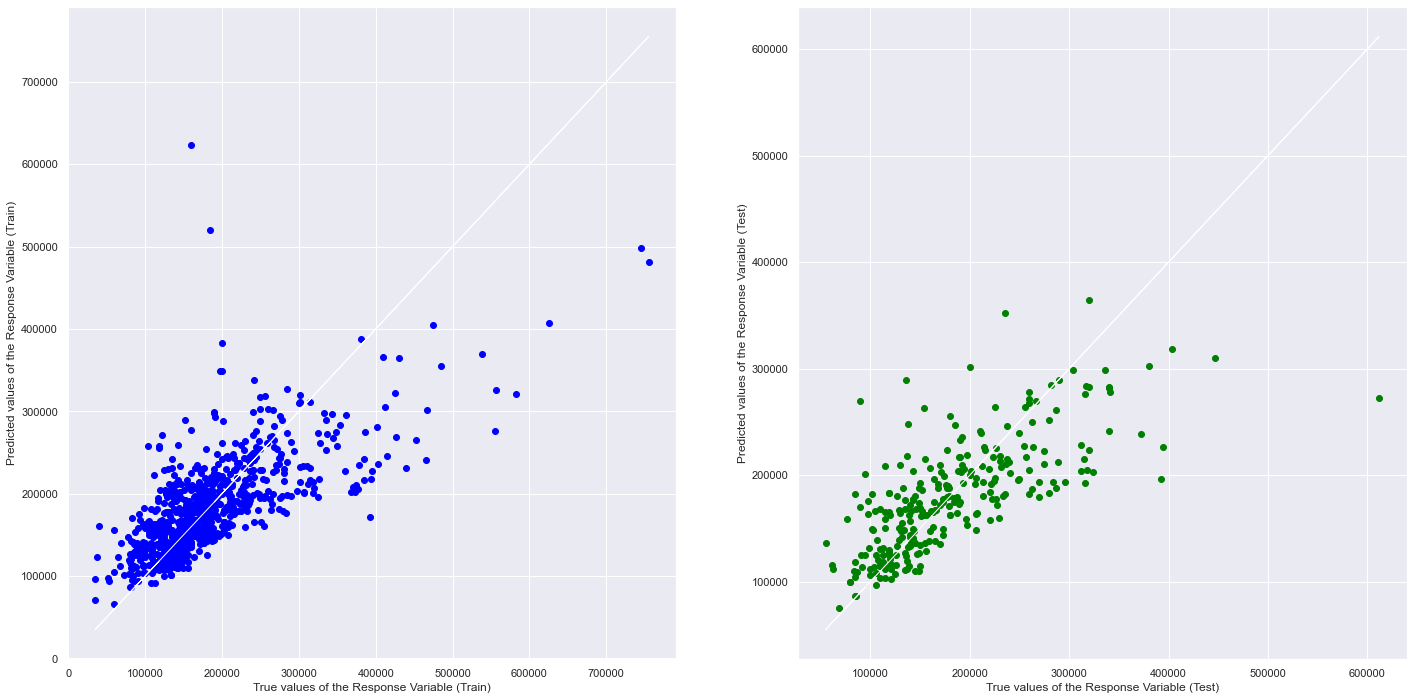

In [48]:
st(X_train[["GrLivArea"]],y_train)

IndexError: index 1 is out of bounds for axis 0 with size 1

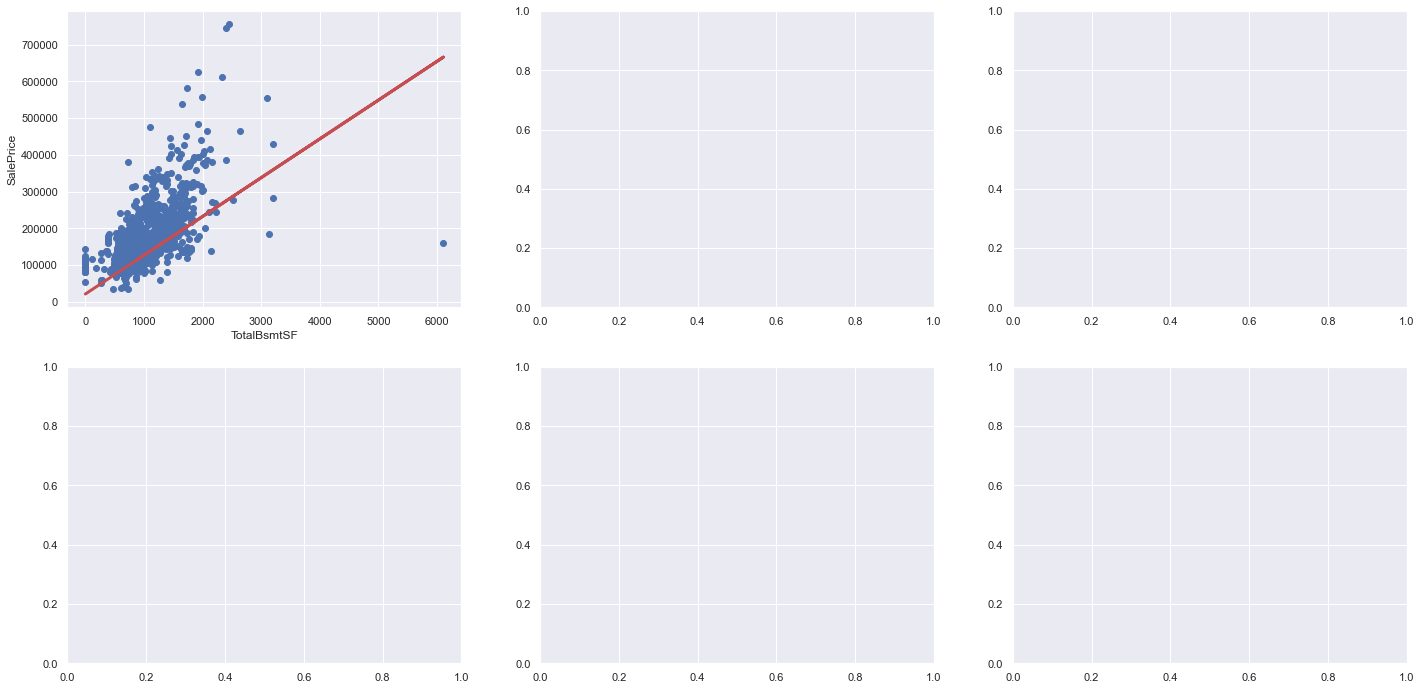

In [43]:
# Plot the Linear Regression line / Plot the regression line based on the coefficients-intercept form
# Formula for the Regression line
# Draw the distributions of all Predictors
f, axes = plt.subplots(2, 3, figsize=(24, 12))

regline_x = X_train["TotalBsmtSF"]
regline_y = linreg.intercept_ + linreg.coef_[0][0] * X_train["TotalBsmtSF"]
axes[0,0].scatter(X_train["TotalBsmtSF"], y_train)
axes[0,0].plot(regline_x, regline_y, 'r-', linewidth = 3 )
axes[0,0].set_xlabel("TotalBsmtSF")
axes[0,0].set_ylabel("SalePrice")

regline_x = X_train["GarageArea"]
regline_y = linreg.intercept_ + linreg.coef_[0][1] * X_train["GarageArea"]
axes[0,1].scatter(X_train["GarageArea"], y_train)
axes[0,1].plot(regline_x, regline_y, 'r-', linewidth = 3 )
axes[0,1].set_xlabel("GarageArea")
axes[0,1].set_ylabel("SalePrice")

regline_x = X_train["GrLivArea"]
regline_y = linreg.intercept_ + linreg.coef_[0][2] * X_train["GrLivArea"]
axes[0,2].scatter(X_train["GrLivArea"], y_train)
axes[0,2].plot(regline_x, regline_y, 'r-', linewidth = 3 )
axes[0,2].set_xlabel("GrLivArea")
axes[0,2].set_ylabel("SalePrice")


# Plot the Linear Regression line / Plot the regression line by prediction using the model.
# Predict Total values corresponding to HP Train
sp_train_pred = linreg.predict(X_train)

# Draw the distributions of all Predictors
linreg.fit(X_train[["TotalBsmtSF"]], y_train) 
sp_train_pred = linreg.predict(X_train[["TotalBsmtSF"]])
axes[1,0].scatter(X_train[["TotalBsmtSF"]], y_train)
axes[1,0].scatter(X_train[["TotalBsmtSF"]], sp_train_pred, color = "r")
axes[1,0].set_xlabel("TotalBsmtSF")
axes[1,0].set_ylabel("SalePrice")

linreg.fit(X_train[["GarageArea"]], y_train) 
#sp_train_pred = linreg.predict(X_train[["GarageArea"]])
axes[1,1].scatter(X_train[["GarageArea"]], ygasp)
axes[1,1].scatter(X_train[["GarageArea"]], xga, color = "r")
axes[1,1].set_xlabel("GarageArea")
axes[1,1].set_ylabel("SalePrice")

linreg.fit(X_train[["GrLivArea"]], y_train) 
#sp_train_pred = linreg.predict(X_train[["GrLivArea"]])
axes[1,2].scatter(X_train[["GrLivArea"]], ygasp)
axes[1,2].scatter(X_train[["GrLivArea"]], xga, color = "r")
axes[1,2].set_xlabel("GrLivArea")
#axes[1.2].set_ylabel("SalePrice")


plt.show()

### Answer Q2  GrLiv Area as the line is closer to the points and will have lesser error compares to other 2 models and has better correlation point/Value

## Problem 3

In this problem, you will consider finer details of the dataset and the variables to refine the model to predict SalePrice.

(a) Find the houses (rows) that are “outliers” for GrLivArea and/or SalePrice. This means outliers for GrLivArea
UNION outliers for SalePrice in a set notation. Remove all these “outliers” from the dataset so that it is clean.

(b) In the outlier-free dataset, create Train and Test sets with an 80:20 ratio, and fit a Linear Regression model on
the Train set to predict SalePrice using GrLivArea. Print the model coefficients and plot the regression line.

(c) Check the Goodness of Fit of the model on the Train set and Prediction Accuracy of the model on the Test set.
Do you think this model is better than the model obtained in Problem 1 for the same variables? Briefly justify.

In [92]:
#p3 = pd.DataFrame(traindata[['SalePrice','GrLivArea']])
p3sp = pd.DataFrame(traindata['SalePrice'])
p3ga = pd.DataFrame(traindata['GrLivArea'])
p3 = pd.DataFrame(traindata[['SalePrice','GrLivArea']])

Q1 = p3.quantile(0.25)
Q3 = p3.quantile(0.75)
IQR = Q3 - Q1



print(len(p3))
((p3 > (Q1 - 1.5 * IQR)) & (p3 < (Q3 + 1.5 * IQR))).value_counts()



1460


SalePrice  GrLivArea
True       True         1383
False      True           46
True       False          16
False      False          15
dtype: int64

<AxesSubplot:>

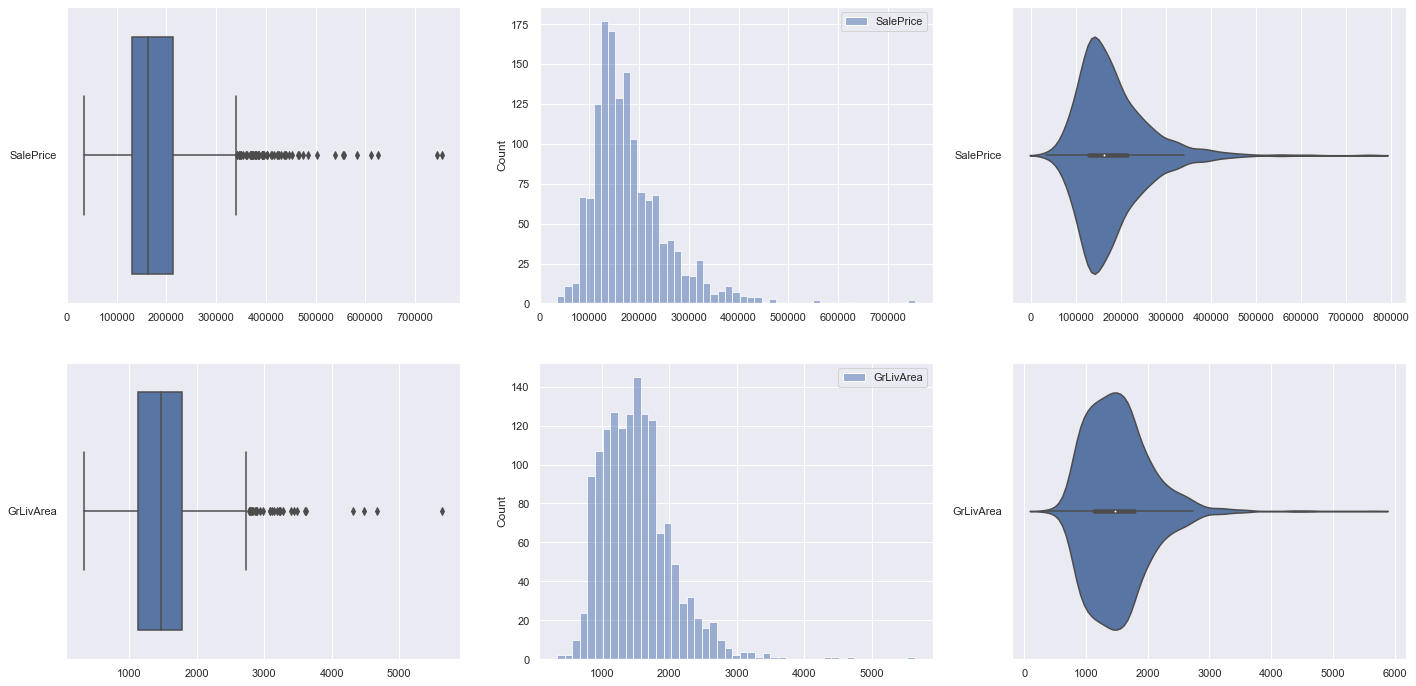

In [65]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for HP Train
sb.boxplot(data = p3sp, orient = "h", ax = axes[0,0])
sb.histplot(data = p3sp, ax = axes[0,1])
sb.violinplot(data = p3sp, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for Total Train
sb.boxplot(data = p3ga, orient = "h", ax = axes[1,0])
sb.histplot(data = p3ga, ax = axes[1,1])
sb.violinplot(data = p3ga, orient = "h", ax = axes[1,2])



In [93]:
# remove outlier
from scipy import stats
#p3sp[(np.abs(stats.zscore(p3sp)) < 3).all(axis=1)]
#p3ga[(np.abs(stats.zscore(p3ga)) < 3).all(axis=1)]


Q1sp = p3['SalePrice'].quantile(0.25)
Q3sp = p3['SalePrice'].quantile(0.75)
IQRsp = Q3sp - Q1sp
print(IQRsp)

Q1ga = p3['GrLivArea'].quantile(0.25)
Q3ga = p3['GrLivArea'].quantile(0.75)
IQRga = Q3ga - Q1ga
print(IQRga)


#((p3 < (Q1 - 1.5 * IQR)) | (p3 > (Q3 + 1.5 * IQR))).value_counts()
p3no = p3

p3no = p3no.loc[(p3no['SalePrice'] > (Q1sp - 1.5 * IQRsp)) &(p3no['SalePrice'] < (Q3sp + 1.5 * IQRsp))]
p3no = p3no.loc[(p3no['GrLivArea'] > (Q1ga - 1.5 * IQRga)) &(p3no['GrLivArea'] < (Q3ga + 1.5 * IQRga))]

#p3no = p3no.loc[(p3no['SalePrice'] > (Q1['SalePrice'] - 1.5 * IQR['SalePrice'])) |(p3no['SalePrice'] < (Q3['SalePrice'] + 1.5 * IQR['SalePrice']))]
#p3no = p3no.loc[(p3no['GrLivArea'] > (Q1['GrLivArea'] - 1.5 * IQR['GrLivArea'])) |(p3no['GrLivArea'] < (Q3['GrLivArea'] + 1.5 * IQR['GrLivArea']))]
                                                             
#p3no = p3no[~((p3no['SalePrice'] < (Q1sp - 1.5 * IQRsp)) |(p3no['SalePrice'] > (Q3sp + 1.5 * IQRsp))).any(axis=1)]
#p3no = p3no[~((p3no['GrLivArea'] < (Q1ga - 1.5 * IQRga)) |(p3no['GrLivArea'] > (Q3ga + 1.5 * IQRga))).any(axis=1)]
p3sp = pd.DataFrame(p3no['SalePrice'])
p3ga = pd.DataFrame(p3no['GrLivArea'])


len(p3no.index)
#((p3no < (Q1 - 1.5 * IQR)) | (p3no > (Q3 + 1.5 * IQR))).sum()

84025.0
647.25


1383

<AxesSubplot:>

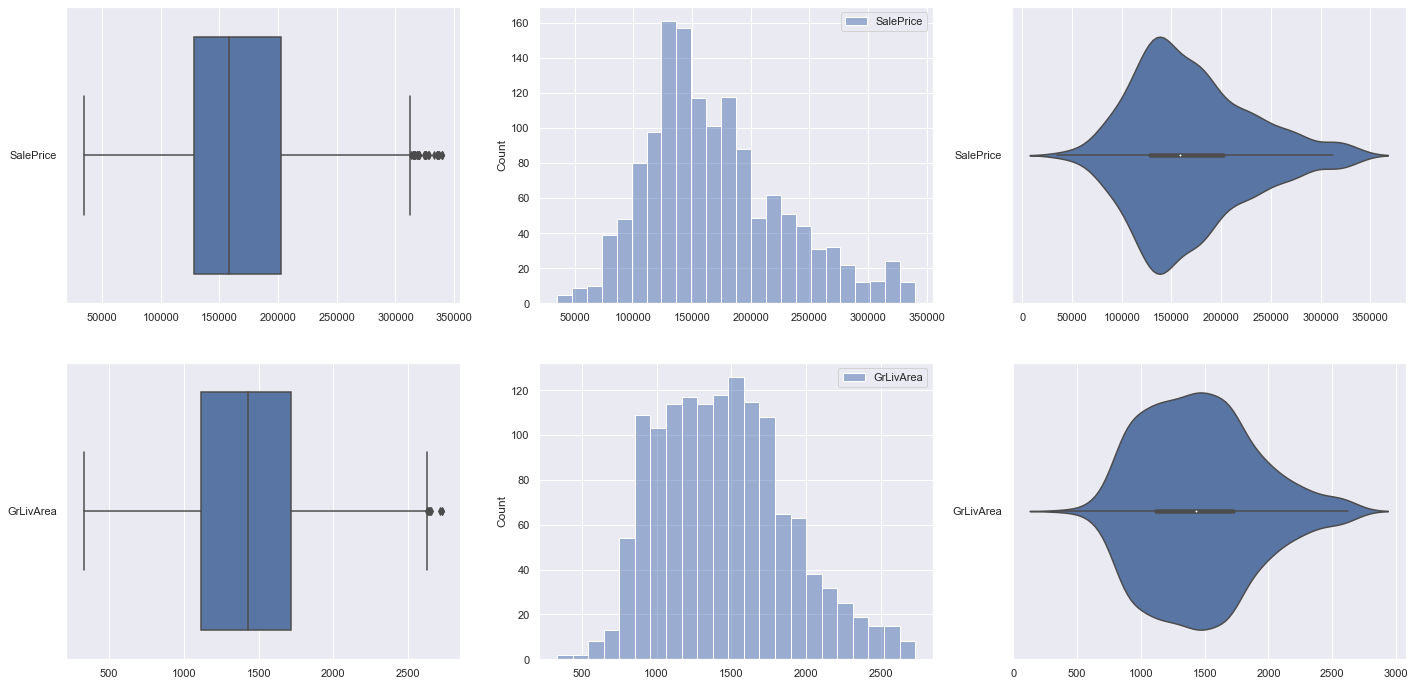

In [94]:
# Set up matplotlib figure with three subplots
f, axes = plt.subplots(2, 3, figsize=(24, 12))

# Plot the basic uni-variate figures for HP Train
sb.boxplot(data = p3sp, orient = "h", ax = axes[0,0])
sb.histplot(data = p3sp, ax = axes[0,1])
sb.violinplot(data = p3sp, orient = "h", ax = axes[0,2])

# Plot the basic uni-variate figures for Total Train
sb.boxplot(data = p3ga, orient = "h", ax = axes[1,0])
sb.histplot(data = p3ga, ax = axes[1,1])
sb.violinplot(data = p3ga, orient = "h", ax = axes[1,2])

In [95]:
#b
sp = pd.DataFrame(p3no['SalePrice'])
ga = pd.DataFrame(p3no['GrLivArea'])

ga_train, ga_test, sp_train, sp_test = train_test_split( ga, sp,  test_size = 0.2)

# Check the sample sizes
print("Train Set :", sp_train.shape, ga_train.shape)
print("Test Set  :", sp_test.shape, ga_test.shape)


Train Set : (1106, 1) (1106, 1)
Test Set  : (277, 1) (277, 1)


<AxesSubplot:>

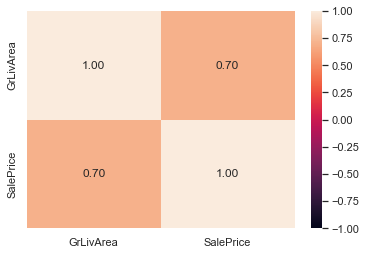

In [96]:
# Create a joint dataframe by concatenating the two variables
traindf = pd.concat([ga_train, sp_train], axis = 1).reindex(ga_train.index)
traindf.corr(method ='pearson')

# Jointplot of Total Train against HP Train
#sb.jointplot(data = traindf, x = "GrLivArea", y = "SalePrice", height = 12)

# Calculate the correlation between the two columns/variables
sb.heatmap(traindf.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [97]:
# Create a Linear Regression object
linreg = LinearRegression()

# Train the Linear Regression model
linreg.fit(ga_train, sp_train)

# Coefficients of the Linear Regression line
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficients \t: a = ', linreg.coef_)

Intercept 	: b =  [32496.34550588]
Coefficients 	: a =  [[94.39543129]]


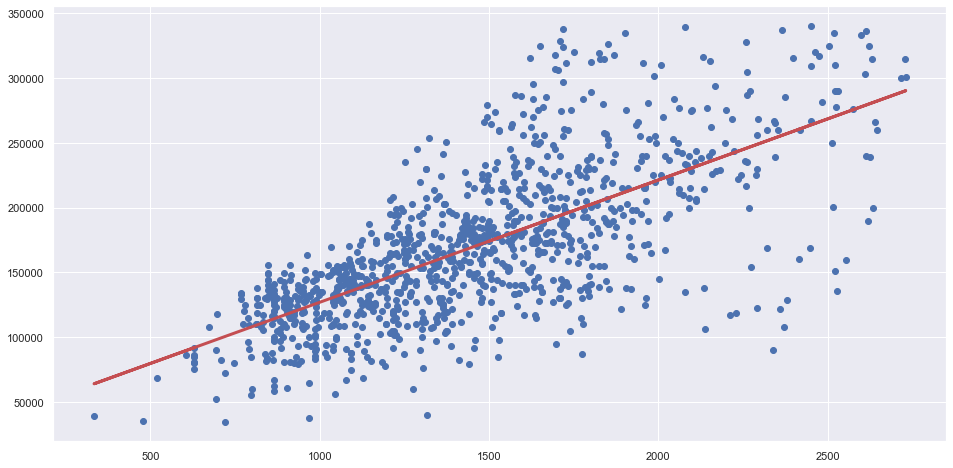

In [98]:
#Q1a) Plot
# Formula for the Regression line
regline_x = ga_train
regline_y = linreg.intercept_ + linreg.coef_ * ga_train

# Plot the Linear Regression line / Plot the regression line based on the coefficients-intercept form
f = plt.figure(figsize=(16, 8))
plt.scatter(ga_train, sp_train)
plt.plot(regline_x, regline_y, 'r-', linewidth = 3)
plt.show()

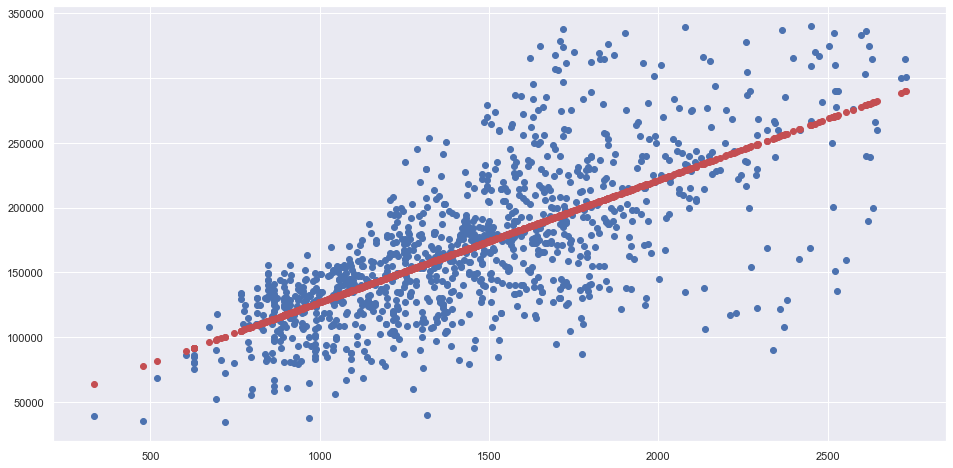

In [99]:
# Predict Total values corresponding to Train
sp_train_pred = linreg.predict(ga_train)

# Plot the Linear Regression line / Plot the regression line by prediction using the model.
f = plt.figure(figsize=(16, 8))
plt.scatter(ga_train, sp_train)
plt.scatter(ga_train, sp_train_pred, color = "r")
plt.show()

In [100]:
#1b
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(ga_train, sp_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(sp_train, sp_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))



Explained Variance (R^2) 	: 0.49225304045929474
Mean Squared Error (MSE) 	: 1726997130.7049942
Root Mean Squared Error (RMSE) 	: 41557.15498810035


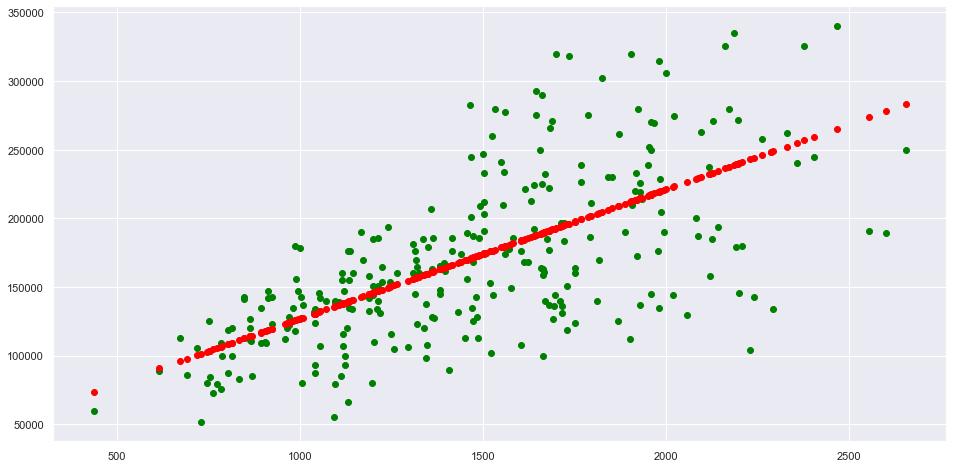

Explained Variance (R^2) 	: 0.42037927141911324
Mean Squared Error (MSE) 	: 2090573123.00429
Root Mean Squared Error (RMSE) 	: 45722.7855997892


In [101]:

# Predict Total values corresponding to GrLivArea Test
sp_test_pred = linreg.predict(ga_test)

# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.scatter(ga_test, sp_test, color = "green")
plt.scatter(ga_test, sp_test_pred, color = "red")
plt.show()


# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(ga_test, sp_test))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_sq_err(sp_test, sp_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))
